In [2]:
import sys
sys.path.append('ocr')

In [3]:
from ocr.natmin.model.trainer import Trainer
from ocr.natmin.tool.config import Cfg

In [4]:
config = Cfg.load_config_from_name('vgg-transformer')

In [5]:
config

{'vocab': 'aAàÀảẢãÃáÁạẠăĂằẰẳẲẵẴắẮặẶâÂầẦẩẨẫẪấẤậẬbBcCdDđĐeEèÈẻẺẽẼéÉẹẸêÊềỀểỂễỄếẾệỆfFgGhHiIìÌỉỈĩĨíÍịỊjJkKlLmMnNoOòÒỏỎõÕóÓọỌôÔồỒổỔỗỖốỐộỘơƠờỜởỞỡỠớỚợỢpPqQrRsStTuUùÙủỦũŨúÚụỤưƯừỪửỬữỮứỨựỰvVwWxXyYỳỲỷỶỹỸýÝỵỴzZ- ',
 'device': 'cuda:0',
 'seq_modeling': 'transformer',
 'transformer': {'d_model': 256,
  'nhead': 8,
  'num_encoder_layers': 6,
  'num_decoder_layers': 6,
  'dim_feedforward': 2048,
  'max_seq_length': 1024,
  'pos_dropout': 0.1,
  'trans_dropout': 0.1},
 'optimizer': {'max_lr': 0.0003, 'pct_start': 0.1},
 'trainer': {'batch_size': 32,
  'print_every': 200,
  'valid_every': 4000,
  'iters': 100000,
  'export': './weights/transformerocr.pth',
  'checkpoint': './checkpoint/transformerocr_checkpoint.pth',
  'log': './train.log',
  'metrics': None},
 'dataset': {'name': 'data',
  'data_root': './img/',
  'train_annotation': 'annotation_train.txt',
  'valid_annotation': 'annotation_val_small.txt',
  'image_height': 32,
  'image_min_width': 32,
  'image_max_width': 512},
 'dataloader': {'num_wo

In [6]:
import os
import random

input_file = "/home/asus/stuDYING/IT/Project_3/data/train_gt.txt"

# Đường dẫn đến thư mục đích
output_dir = "/home/asus/stuDYING/IT/Project_3/data/"

# Đọc dữ liệu từ tệp tin gốc với mã hóa "utf-8"
with open(input_file, "r", encoding="utf-8") as file:
    lines = file.readlines()

# Trộn ngẫu nhiên dữ liệu
random.shuffle(lines)

# Tính toán số lượng mẫu cho tập huấn luyện và kiểm tra
total_samples = len(lines)
train_ratio = 0.9
train_samples = int(total_samples * train_ratio)

# Chia dữ liệu thành tập huấn luyện và kiểm tra
train_data = lines[:train_samples]
test_data = lines[train_samples:]

# Ghi dữ liệu vào các tệp tin mới với mã hóa "utf-8"
def write_data(filename, data):
    with open(filename, "w", encoding="utf-8") as file:
        file.writelines(data)

train_output_file = os.path.join(output_dir, "train_line_annotation.txt")
test_output_file = os.path.join(output_dir, "test_line_annotation.txt")

write_data(train_output_file, train_data)
write_data(test_output_file, test_data)

In [7]:
dataset_params = {
    'name':'hw',
    'data_root':'/home/asus/stuDYING/IT/Project_3/data/new_train',
    'train_annotation':'/home/asus/stuDYING/IT/Project_3/data/train_line_annotation.txt',
    'valid_annotation':'/home/asus/stuDYING/IT/Project_3/data/test_line_annotation.txt'
}

params = {
         'print_every':200,
         'valid_every':15*200,
          'iters':40000,
          'checkpoint':'./checkpoint/transformerocr_checkpoint.pth',
          'export':'./weights/transformerocr.pth',
          'metrics': 10000
         }

config['trainer'].update(params)
config['dataset'].update(dataset_params)
config['device'] = 'cuda:0'

In [8]:
config

{'vocab': 'aAàÀảẢãÃáÁạẠăĂằẰẳẲẵẴắẮặẶâÂầẦẩẨẫẪấẤậẬbBcCdDđĐeEèÈẻẺẽẼéÉẹẸêÊềỀểỂễỄếẾệỆfFgGhHiIìÌỉỈĩĨíÍịỊjJkKlLmMnNoOòÒỏỎõÕóÓọỌôÔồỒổỔỗỖốỐộỘơƠờỜởỞỡỠớỚợỢpPqQrRsStTuUùÙủỦũŨúÚụỤưƯừỪửỬữỮứỨựỰvVwWxXyYỳỲỷỶỹỸýÝỵỴzZ- ',
 'device': 'cuda:0',
 'seq_modeling': 'transformer',
 'transformer': {'d_model': 256,
  'nhead': 8,
  'num_encoder_layers': 6,
  'num_decoder_layers': 6,
  'dim_feedforward': 2048,
  'max_seq_length': 1024,
  'pos_dropout': 0.1,
  'trans_dropout': 0.1},
 'optimizer': {'max_lr': 0.0003, 'pct_start': 0.1},
 'trainer': {'batch_size': 32,
  'print_every': 200,
  'valid_every': 3000,
  'iters': 40000,
  'export': './weights/transformerocr.pth',
  'checkpoint': './checkpoint/transformerocr_checkpoint.pth',
  'log': './train.log',
  'metrics': 10000},
 'dataset': {'name': 'hw',
  'data_root': '/home/asus/stuDYING/IT/Project_3/data/new_train',
  'train_annotation': '/home/asus/stuDYING/IT/Project_3/data/train_line_annotation.txt',
  'valid_annotation': '/home/asus/stuDYING/IT/Project_3/data/test

In [9]:
trainer = Trainer(config, pretrained=False)

Create train_hw: 100%|██████████████████████████████████████| 92700/92700 [00:28<00:00, 3274.12it/s]

Created dataset with 92699 samples



Create valid_hw: 100%|███████████████████████████████████████| 10300/10300 [00:15<00:00, 666.07it/s]

Created dataset with 10299 samples



valid_hw build cluster: 100%|█████████████████████████████| 10299/10299 [00:00<00:00, 153829.38it/s]


In [10]:
trainer.config.save('config.yml')

In [12]:
trainer.train()

iter: 000200 - train loss: 2.463 - lr: 1.38e-05 - load time: 0.26 - gpu time: 34.87
iter: 000400 - train loss: 2.209 - lr: 1.91e-05 - load time: 0.05 - gpu time: 32.19
iter: 000600 - train loss: 2.047 - lr: 2.77e-05 - load time: 0.05 - gpu time: 33.53
iter: 000800 - train loss: 1.926 - lr: 3.95e-05 - load time: 0.05 - gpu time: 32.14
iter: 001000 - train loss: 1.805 - lr: 5.42e-05 - load time: 0.05 - gpu time: 32.86
iter: 001200 - train loss: 1.675 - lr: 7.14e-05 - load time: 0.05 - gpu time: 33.34
iter: 001400 - train loss: 1.633 - lr: 9.07e-05 - load time: 0.05 - gpu time: 33.91
iter: 001600 - train loss: 1.504 - lr: 1.12e-04 - load time: 0.06 - gpu time: 32.58
iter: 001800 - train loss: 1.443 - lr: 1.34e-04 - load time: 0.05 - gpu time: 33.28
iter: 002000 - train loss: 1.371 - lr: 1.56e-04 - load time: 0.05 - gpu time: 32.51
iter: 002200 - train loss: 1.301 - lr: 1.79e-04 - load time: 0.05 - gpu time: 33.35
iter: 002400 - train loss: 1.257 - lr: 2.01e-04 - load time: 0.05 - gpu time

/home/asus/stuDYING/IT/Project_3/ocr/natmin/tool/translate.py:119: RuntimeWarning: invalid value encountered in divide
  char_probs = np.sum(char_probs, axis=-1) / (char_probs > 0).sum(-1)


iter: 006000 - valid loss: 0.777 - acc full seq: 0.5296 - acc per char: 0.7886
iter: 006200 - train loss: 0.815 - lr: 2.97e-04 - load time: 0.05 - gpu time: 33.35
iter: 006400 - train loss: 0.776 - lr: 2.97e-04 - load time: 0.05 - gpu time: 33.28
iter: 006600 - train loss: 0.797 - lr: 2.96e-04 - load time: 0.06 - gpu time: 33.41
iter: 006800 - train loss: 0.791 - lr: 2.96e-04 - load time: 0.06 - gpu time: 32.95
iter: 007000 - train loss: 0.791 - lr: 2.95e-04 - load time: 0.07 - gpu time: 32.95
iter: 007200 - train loss: 0.763 - lr: 2.94e-04 - load time: 0.08 - gpu time: 34.52
iter: 007400 - train loss: 0.764 - lr: 2.93e-04 - load time: 0.06 - gpu time: 33.84
iter: 007600 - train loss: 0.779 - lr: 2.93e-04 - load time: 0.06 - gpu time: 33.96
iter: 007800 - train loss: 0.767 - lr: 2.92e-04 - load time: 0.05 - gpu time: 32.79
iter: 008000 - train loss: 0.771 - lr: 2.91e-04 - load time: 0.05 - gpu time: 33.13
iter: 008200 - train loss: 0.742 - lr: 2.90e-04 - load time: 0.05 - gpu time: 33.

In [9]:
from ocr.natmin.tool.predictor import Predictor

In [10]:
from PIL import Image

In [11]:
config = Cfg.load_config_from_name('vgg-transformer')
config['weights'] = '/home/asus/stuDYING/IT/Project_3/weights/transformerocr.pth'
config['device'] = 'cuda:0'

detector = Predictor(config)

img = '/home/asus/stuDYING/IT/Project_3/data/new_train/train_img_80928.png'
img = Image.open(img)
# dự đoán
s = detector.predict(img, return_prob=True)

/home/asus/anaconda3/envs/datamining/lib/python3.8/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/asus/anaconda3/envs/datamining/lib/python3.8/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG19_BN_Weights.IMAGENET1K_V1`. You can also use `weights=VGG19_BN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


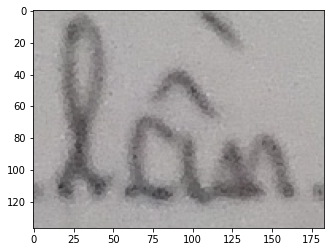

('lần', 0.925010065237681)


In [15]:
# show the image using matplotlib
import matplotlib.pyplot as plt
plt.imshow(img)
plt.show()

print(s)

In [21]:
d = os.listdir('/home/asus/stuDYING/IT/Project_3/data/public_test_data/new_public_test')
len(d)

33000

In [27]:
public_test_folder = '/home/asus/stuDYING/IT/Project_3/data/public_test_data/new_public_test/'

with open('/home/asus/stuDYING/IT/Project_3/prediction.txt', 'w') as f:
    for i in d:
        img = Image.open(os.path.join(public_test_folder, i))
        s = detector.predict(img, return_prob=False)
        f.write(f'{i}  {s}\n')

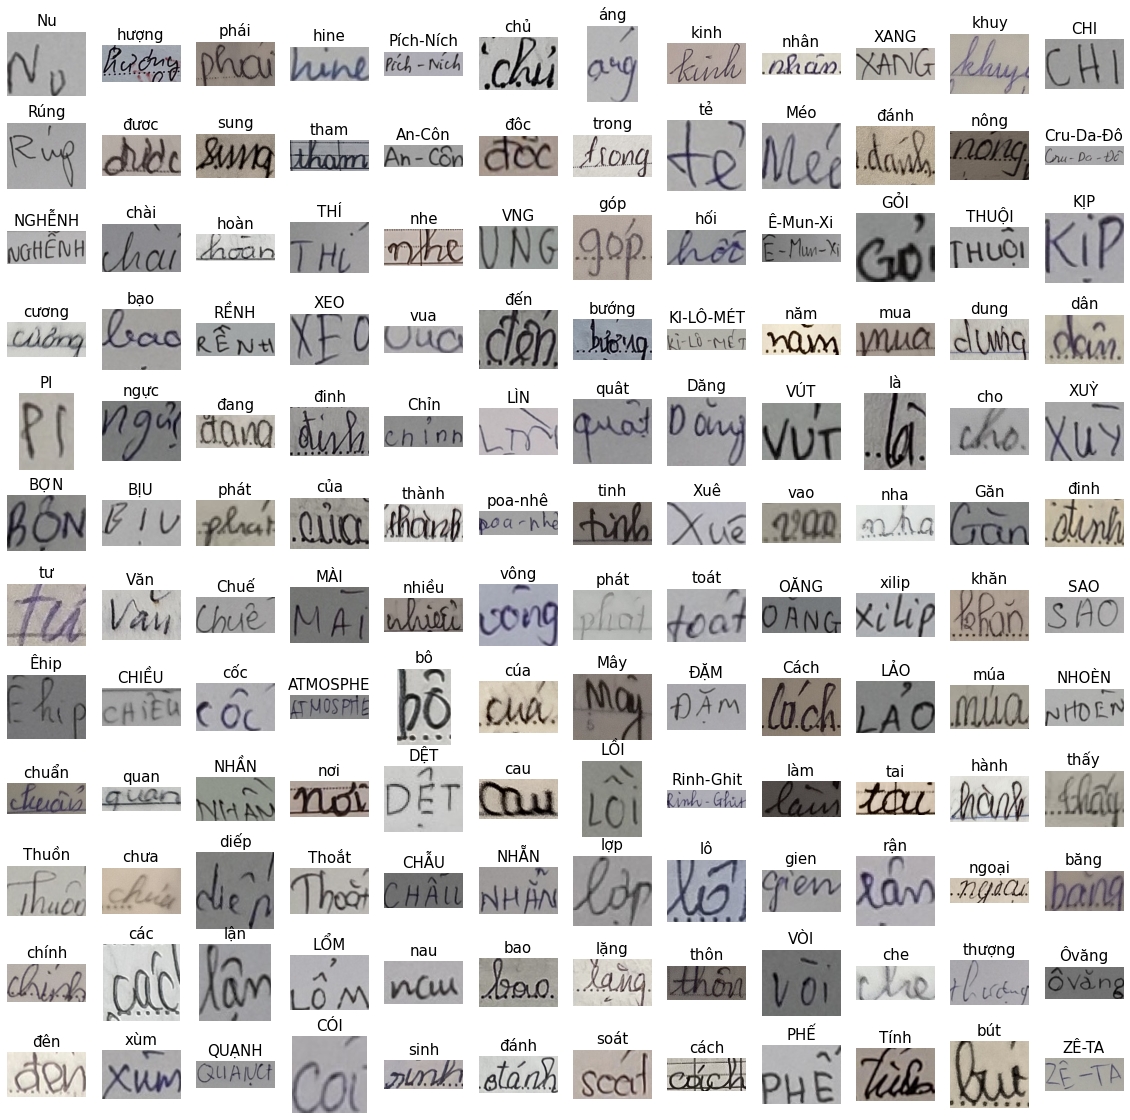

In [39]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import os
import random
from PIL import Image

public_test_folder = '/home/asus/stuDYING/IT/Project_3/data/public_test_data/new_public_test/'
d = os.listdir(public_test_folder)
random.shuffle(d)

columns = 12
rows = 12
fig, ax = plt.subplots(columns, rows, figsize=(20, 20))
for i in range(rows * columns):
    img = Image.open(os.path.join(public_test_folder, d[i]))
    s = detector.predict(img, return_prob=False)
    title = f"{s}"
    ax[i // columns, i % rows].imshow(img, cmap="gray")
    ax[i // columns, i % rows].set_title(title, fontsize=15)
    ax[i // columns, i % rows].axis("off")

plt.show()